mean-shift clustering algorithm

MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

The position of centroid candidates is iteratively adjusted using a technique called hill climbing, which finds local maxima of the estimated probability density. Given a candidate centroid for iteration

, the candidate is updated according to the following equation:

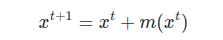

Where is the mean shift vector that is computed for each centroid that points towards a region of the maximum increase in the density of points. To compute 'm' we define 'N(x)' as the neighborhood of samples within a given distance around 'x' .Then 'm'

is computed using the following equation, effectively updating a centroid to be the mean of the samples within its neighborhood:

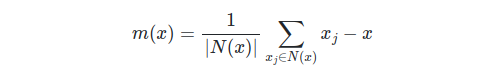

In general, the equation for 'm' depends on a kernel used for density estimation. The generic formula is:

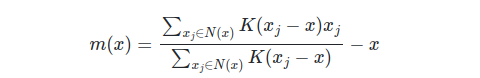

In our implementation'K(x)', is equal to 1 if is 'x' small enough and is equal to 0 otherwise. Effectively 'K(y-x)'indicates whether 'y' is in the neighborhood of 'x' .

In [1]:
import numpy as np

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

In [3]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


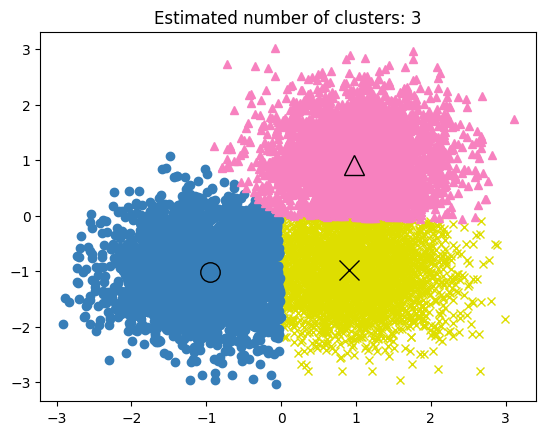

In [4]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()